In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

sns.set(style="darkgrid")

In [2]:
supermarket_df = pd.read_csv("supermarket_till_transactions.csv")

In [3]:
supermarket_df.columns

Index(['SHOP_WEEK', 'SHOP_DATE', 'SHOP_WEEKDAY', 'SHOP_HOUR', 'QUANTITY',
       'SPEND', 'PROD_CODE', 'PROD_CODE_10', 'PROD_CODE_20', 'PROD_CODE_30',
       'PROD_CODE_40', 'CUST_CODE', 'CUST_PRICE_SENSITIVITY', 'CUST_LIFESTAGE',
       'BASKET_ID', 'BASKET_SIZE', 'BASKET_PRICE_SENSITIVITY', 'BASKET_TYPE',
       'BASKET_DOMINANT_MISSION', 'STORE_CODE', 'STORE_FORMAT',
       'STORE_REGION'],
      dtype='object')

In [4]:
basket_size_analysis_main_df = supermarket_df[['SHOP_HOUR','QUANTITY','BASKET_TYPE','BASKET_DOMINANT_MISSION','BASKET_SIZE','SPEND']]
basket_size_analysis_main_df.sample(10)

,SHOP_HOUR,QUANTITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,BASKET_SIZE,SPEND
52,9,3,Full Shop,Mixed,L,357
19,15,1,Small Shop,Mixed,M,22
116,19,1,Small Shop,Grocery,M,450
68,20,1,Small Shop,Fresh,M,129
78,13,1,Top Up,Fresh,L,52
99,15,1,Top Up,Fresh,L,164
58,9,1,Full Shop,Mixed,L,1406
49,9,1,Full Shop,Mixed,L,391
57,9,1,Full Shop,Mixed,L,64
10,20,1,Top Up,Fresh,L,129


1. Pie Chart - This is to show the proportions of each of the basket sizes by spend
2. Bar graph - to show SPEND side by side for each basket size
3. Pair plot - 

In [5]:
basket_size_analysis_pie_df = basket_size_analysis_main_df.groupby(["BASKET_SIZE"]).sum()
# basket_size_analysis_pie_df.reset_index()
basket_size_analysis_pie_df.reset_index()

,BASKET_SIZE,SHOP_HOUR,QUANTITY,SPEND
0,L,1030,134,17246
1,M,492,40,5274
2,S,75,6,1649


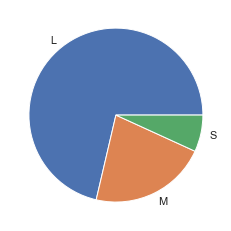

In [6]:
basket_size_analysis_pie2_df = basket_size_analysis_main_df.groupby(["BASKET_SIZE"]).sum().reset_index()
plt.pie(x=basket_size_analysis_pie2_df.SPEND,labels=basket_size_analysis_pie2_df.BASKET_SIZE)
plt.show()

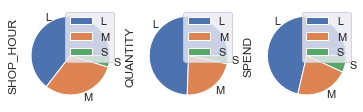

In [7]:
basket_size_analysis_pie_df.plot.pie(subplots=True);

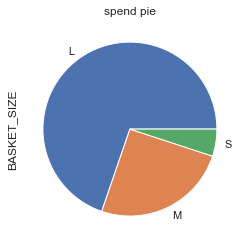

In [8]:
basket_size_analysis_main_df.BASKET_SIZE.value_counts().plot(kind="pie")
# basket_size_analysis_main_df.BASKET_SIZE.value_counts().plot(kind="bar")
plt.title("spend pie")
plt.show;

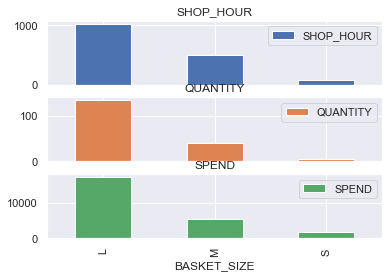

In [9]:
basket_size_analysis_pie_df.plot.bar(subplots=True);

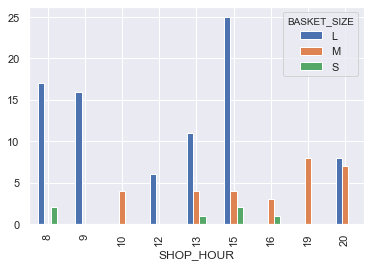

In [10]:
pd.crosstab(basket_size_analysis_main_df.SHOP_HOUR, basket_size_analysis_main_df.BASKET_SIZE).plot(kind="bar");

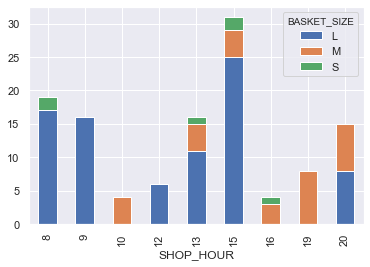

In [11]:
pd.crosstab(basket_size_analysis_main_df.SHOP_HOUR, basket_size_analysis_main_df.BASKET_SIZE).plot(kind="bar",stacked=True);

In [12]:
basket_size_analysis_main_df.sample(10)

,SHOP_HOUR,QUANTITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,BASKET_SIZE,SPEND
71,16,1,Small Shop,Fresh,M,63
106,12,1,Top Up,Nonfood,L,247
74,13,3,Top Up,Grocery,M,279
25,15,1,Top Up,Fresh,L,92
60,9,4,Full Shop,Mixed,L,1820
43,8,1,Full Shop,Mixed,L,226
46,9,1,Full Shop,Mixed,L,52
103,12,3,Top Up,Nonfood,L,513
111,10,1,Small Shop,Nonfood,M,117
45,8,1,Full Shop,Mixed,L,97


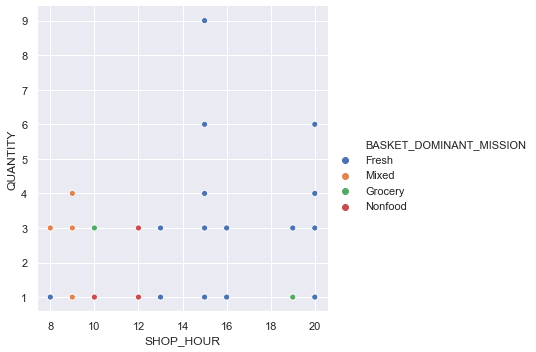

In [13]:
sns.relplot(x="SHOP_HOUR",y="QUANTITY", hue="BASKET_DOMINANT_MISSION", data=basket_size_analysis_main_df);

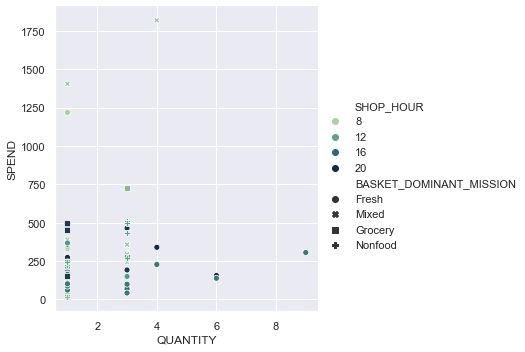

In [14]:
sns.relplot(x="QUANTITY",y="SPEND", hue="SHOP_HOUR",style="BASKET_DOMINANT_MISSION", palette="ch:r=-.5,l=.75", data=basket_size_analysis_main_df);

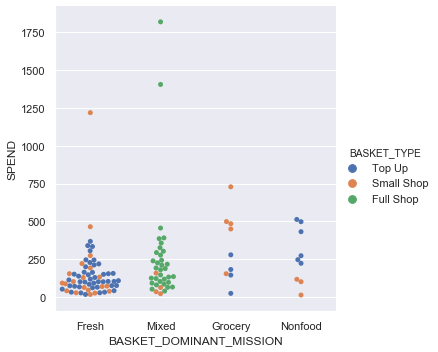

In [15]:
sns.catplot(data=basket_size_analysis_main_df, x = "BASKET_DOMINANT_MISSION", y="SPEND", hue="BASKET_TYPE" ,kind="swarm");

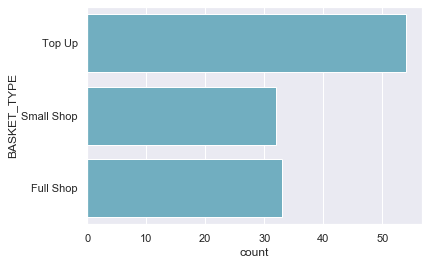

In [16]:
sns.countplot(data=basket_size_analysis_main_df, y="BASKET_TYPE", color="c");

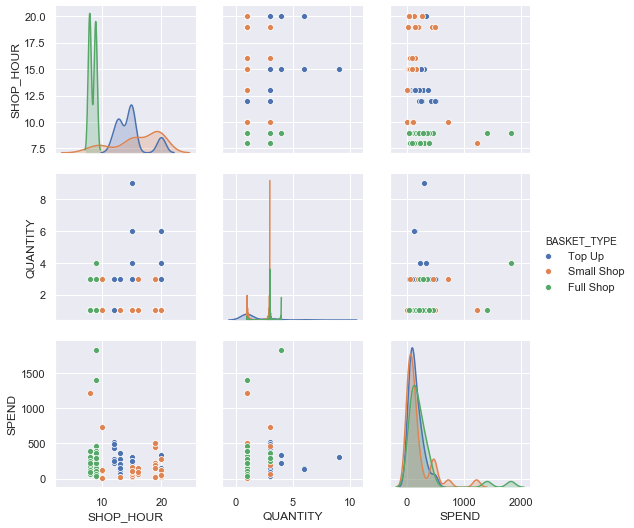

In [17]:
sns.pairplot(data=basket_size_analysis_main_df, hue="BASKET_TYPE");

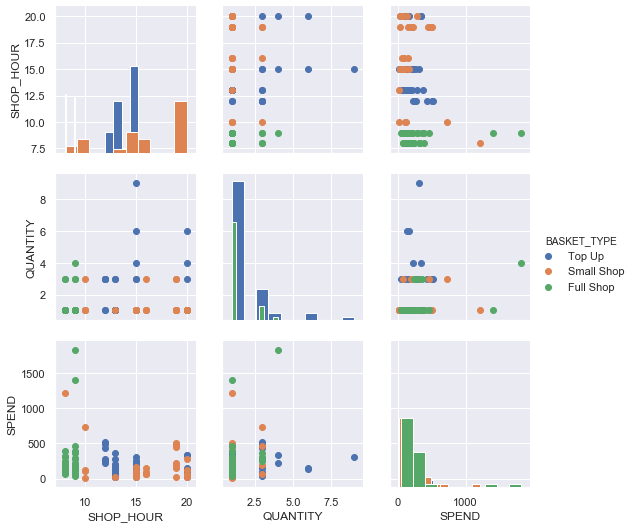

In [18]:
g=sns.PairGrid(data=basket_size_analysis_main_df, hue="BASKET_TYPE");
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

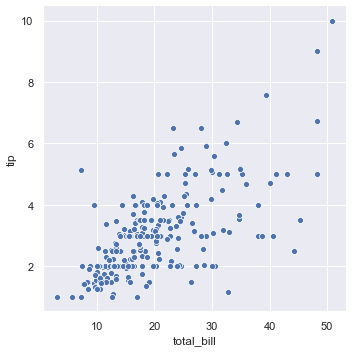

In [19]:
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", data=tips);

In [20]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [21]:
# Import RMSE
from statsmodels.tools.eval_measures import rmse

# Import Linear Regression from scikit-learn
from sklearn.linear_model import LinearRegression

# Import Metrics
from sklearn.metrics import mean_squared_error, r2_score

#Import data split
from sklearn.model_selection import train_test_split

In [22]:
for x in range(25):
    if x>=4 and x<12:
        basket_size_analysis_main_df.SHOP_HOUR.replace(to_replace=x,value="Morning",inplace=True)
    elif x>=12 and x <16:
        basket_size_analysis_main_df.SHOP_HOUR.replace(to_replace=x,value="Afternoon",inplace=True)
    elif x >= 16 and x < 23:
        basket_size_analysis_main_df.SHOP_HOUR.replace(to_replace=x,value="Evening",inplace=True)
    else:
        basket_size_analysis_main_df.SHOP_HOUR.replace(to_replace=x,value="Night",inplace=True)
        
    x+=1

basket_size_analysis_main_df.BASKET_SIZE.replace(to_replace="S",value="M",inplace=True)

basket_size_analysis_main_df.sample(10)    

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,SHOP_HOUR,QUANTITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,BASKET_SIZE,SPEND
79,Afternoon,1,Top Up,Fresh,L,368
116,Evening,1,Small Shop,Grocery,M,450
118,Evening,1,Small Shop,Grocery,M,499
30,Morning,1,Full Shop,Mixed,L,132
57,Morning,1,Full Shop,Mixed,L,64
28,Afternoon,1,Top Up,Fresh,L,219
19,Afternoon,1,Small Shop,Mixed,M,22
36,Morning,1,Full Shop,Mixed,L,135
111,Morning,1,Small Shop,Nonfood,M,117
117,Evening,1,Small Shop,Grocery,M,154


In [23]:
basket_y = basket_size_analysis_main_df.SPEND
basket_x = basket_size_analysis_main_df[["SHOP_HOUR", "QUANTITY", "BASKET_TYPE", "BASKET_DOMINANT_MISSION", "BASKET_SIZE"]]

In [24]:
basket_x = pd.get_dummies(data=basket_x, columns=["SHOP_HOUR", "BASKET_TYPE", "BASKET_DOMINANT_MISSION", "BASKET_SIZE"])
basket_x.sample(10)

,QUANTITY,SHOP_HOUR_Afternoon,SHOP_HOUR_Evening,SHOP_HOUR_Morning,BASKET_TYPE_Full Shop,BASKET_TYPE_Small Shop,BASKET_TYPE_Top Up,BASKET_DOMINANT_MISSION_Fresh,BASKET_DOMINANT_MISSION_Grocery,BASKET_DOMINANT_MISSION_Mixed,BASKET_DOMINANT_MISSION_Nonfood,BASKET_SIZE_L,BASKET_SIZE_M
113,1,1,0,0,0,1,0,1,0,0,0,0,1
89,1,1,0,0,0,0,1,1,0,0,0,1,0
61,1,0,0,1,1,0,0,0,0,1,0,1,0
91,1,1,0,0,0,0,1,1,0,0,0,1,0
88,1,1,0,0,0,0,1,1,0,0,0,1,0
26,1,1,0,0,0,1,0,0,0,1,0,0,1
93,1,1,0,0,0,0,1,1,0,0,0,1,0
109,1,0,0,1,0,1,0,0,0,0,1,0,1
36,1,0,0,1,1,0,0,0,0,1,0,1,0
74,3,1,0,0,0,0,1,0,1,0,0,0,1


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

supm

vif = pd.DataFrame()
vif["features"] = supm.columns
vif["VIF Factor"] = [variance_inflation_factor(supm.values, i) for i in range(supm.shape[1])]
vif 

In [25]:
X_train, X_test, y_train, y_test = train_test_split(basket_x, basket_y, test_size=0.25)

In [26]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
X_train.columns

(89, 13) (30, 13) (89,) (30,)


Index(['QUANTITY', 'SHOP_HOUR_Afternoon', 'SHOP_HOUR_Evening',
       'SHOP_HOUR_Morning', 'BASKET_TYPE_Full Shop', 'BASKET_TYPE_Small Shop',
       'BASKET_TYPE_Top Up', 'BASKET_DOMINANT_MISSION_Fresh',
       'BASKET_DOMINANT_MISSION_Grocery', 'BASKET_DOMINANT_MISSION_Mixed',
       'BASKET_DOMINANT_MISSION_Nonfood', 'BASKET_SIZE_L', 'BASKET_SIZE_M'],
      dtype='object')

In [27]:
lm = LinearRegression()
scikit_model = lm.fit(X_train,y_train)

In [28]:
print(scikit_model.coef_,scikit_model.intercept_)

[  51.26870227  -83.1192458   -91.20756901  174.32681481 -101.493094
  160.03497797  -58.54188397  -66.86185973  182.36064132  -92.03708578
  -23.46169582  117.26855785 -117.26855785] 152.78787585291417


In [29]:
ypred = scikit_model.predict(X_test)
rmse(y_test, ypred)

143.93160750703063

In [34]:
basket_x.describe()

,QUANTITY,SHOP_HOUR_Afternoon,SHOP_HOUR_Evening,SHOP_HOUR_Morning,BASKET_TYPE_Full Shop,BASKET_TYPE_Small Shop,BASKET_TYPE_Top Up,BASKET_DOMINANT_MISSION_Fresh,BASKET_DOMINANT_MISSION_Grocery,BASKET_DOMINANT_MISSION_Mixed,BASKET_DOMINANT_MISSION_Nonfood,BASKET_SIZE_L,BASKET_SIZE_M
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,1.512605,0.445378,0.226891,0.327731,0.277311,0.268908,0.453782,0.537815,0.075630,0.310924,0.075630,0.697479,0.302521
std,1.227272,0.499109,0.420592,0.471371,0.449564,0.445267,0.499964,0.500676,0.265524,0.464829,0.265524,0.461292,0.461292
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
